# Python code for the project cleaning data

## Load libraries 

In [294]:
import pandas as pd
import numpy as np

### Visualization and first analyzis of the data

In [190]:
# Read the file
data = pd.read_excel("5 - New markets .xlsx")

In [191]:
data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


Our first observations:
it seems to be datas to identify different groups of potential clients.
We first see that the types are quite coherent with the data (except family size that could be an integer).
There are null values
There are a lot of categorical data that we'll need to encode.
We'll have to check if the ID is really unique, and use it as index.
We will need to understand what the var column refers to;
the titles of columns are clean but we'll have to harmonize the writting for the categorical values : we already see that gender needs to be harmonized

In [195]:
# Descriptive statistics 
DescStats = data.describe()
DescStats

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


With describe, it doesn't seem that there is too many incoherency :
the range for age seems correct : between 18 and 89, we'll have to check the coherence with the profession category
and we'll check also the coherency between age and work_experience

### Cleaning Text and Removing Special Characters

We can notice that column names are already clean.
In order to proporly analyze the data we need to uniformize the data in each column. We should replace lower case f in femal into an upper case. No other modification needed in the other columns 

In [197]:
data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [198]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [199]:
print('In the column Gender : ', data['Gender'].unique())
print('\n')
print('In the column Ever_Married : ', data['Ever_Married'].unique())
print('\n')
print('In the column Graduated : ', data['Graduated'].unique())
print('\n')
print('In the column Profession : ', data['Profession'].unique())
print('\n')
print('In the column Spending_Score : ', data['Spending_Score'].unique())
print('\n')
print('In the column Var_1 : ', data['Var_1'].unique())


In the column Gender :  ['Female' 'Male' 'female']


In the column Ever_Married :  ['Yes' 'No' nan]


In the column Graduated :  ['Yes' 'No' nan]


In the column Profession :  ['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']


In the column Spending_Score :  ['Low' 'Average' 'High']


In the column Var_1 :  ['Cat_6' 'Cat_4' 'Cat_3' nan 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']


In [200]:
data['Gender'] = data['Gender'].str.capitalize()
data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


### Check out the duplicates in the ID column

We first check if there is identical rows and drop if it is the case. 
Then we check the duplicates inside the ID columns without dropping them at first. This could allow us in case of ID duplicates to be able to choose the rows that need to be dropped.
We ended concluding that there is 0 duplicates in our table.

In [201]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [202]:
sum(data['ID'].value_counts()>1)

0

### Check for missing values and fill them if needed

In order to be able to manipulate columns (ex; changing data types) we need to perform this step at this early stage

In [203]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

#### Making decisions about missing values: 
 - For Ever_Married we decide to differentiate the null values into a new attribute called "Maybe". This way we can based on the analysis that we are doing to keep or remove these rows
 - For Graduated we decide to check the rows with null values and compare them to the columns "Profession" and "Age" to see if we can find cases where profession is defined so we can replace the null values by "Yes". If it is not the case we replace by "No" expecially for young ages that cuold be students. 
 - For the "Profession" first we can check the age to exclude population over 65 that could be retired. We can also check the Work_Experience and the age. We check if the person do not have a profession and is in a student age range (18-28) we can replace the null_value by "Student. If the person is between 28-65 with no Work-Experience we can replace it by "StayHome"
 - For Work_Experience we can check the profession and see if we can put 0 for the "StayHome" people. For other cases we replace them with the mean of Work_Experience. 
 - For Family_Size we can check the marital status. If the person is married we replace the null value by the mean of family size of married peeople. If the person is not married we replace the null values by the mean of non married people. 
 - For Var_1 column we still can't decide how to handle missing values at this stage. We need to go further in order to understand this column. 

##### For Ever_Married we decide to differentiate the null values into a new attribute called "Maybe". This way we can based on the analysis that we are doing to keep or remove these rows

In [204]:
def ever_married_clean(data):
    data.loc[(data['Ever_Married'].isnull()==True),"Ever_Married"]="Maybe"
    return data

In [205]:
ever_married_clean(data)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


##### For Graduated we decide to check the rows with null values and compare them to the columns "Profession" and "Age" to see if we can find cases where profession is defined so we can replace the null values by "Yes". If it is not the case we replace by "No" expecially for young ages that cuold be students.

In [206]:
null_graduated = data[(data['Graduated'].isnull()==True)]
null_graduated.sort_values('Age')

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2269,466750,Female,No,18,NaN,Healthcare,0.0,Low,3.0,Cat_3
2270,466751,Female,No,20,NaN,Healthcare,1.0,Low,4.0,Cat_6
1304,463351,Female,No,21,NaN,Healthcare,3.0,Low,4.0,Cat_5
2268,466749,Male,No,22,NaN,Healthcare,1.0,Low,5.0,Cat_3
376,460211,Male,Yes,28,NaN,Artist,6.0,Low,1.0,Cat_6
1441,463819,Male,Yes,28,NaN,Artist,8.0,Low,NaN,Cat_6
1741,464916,Female,Maybe,32,NaN,Doctor,8.0,High,2.0,Cat_4
948,462177,Male,No,35,NaN,Artist,6.0,Low,5.0,Cat_2
2389,467172,Male,No,36,NaN,Artist,9.0,Low,2.0,Cat_6
521,460660,Male,No,39,NaN,Entertainment,6.0,Low,1.0,Cat_6


In [207]:
#For the people aged from 18-28 we assume that they could still be students so we can replace the null value by No
#For the people aged more than 18-28 if they have a defined profession (no Null value in Profession) we can assume that they have graduated so we replace the NaN by Yes
#For the people aged more than 18-28 if they have numm values in Profession and Graduation they will be dropped
def graduation_clean(data):
    data.loc[(data['Graduated'].isnull()==True) & (data['Age'] <= 28 ), 'Graduated'] = "No"
    data.loc[(data['Graduated'].isnull()==True) & (data['Age'] > 28 ) & (data['Profession'].isnull()!=True), 'Graduated'] = "Yes"
    data = data.drop((null_graduated.loc[(data['Graduated'].isnull()==True) & (data['Profession'].isnull()==True)  & (data['Age'] > 28 ), 'Graduated']).index)
    return data

In [208]:
graduation_clean(data)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


##### For the "Profession" first we can check the age to exclude population over 65 that could be retired. We can also check the Work_Experience and the age. We check if the person do not have a profession and is in a student age range (18-28) we can replace the null_value by "Student. If the person is between 28-65 with no Work-Experience we can replace it by "StayHome"

In [209]:
def profession_missingvalues(data):
    data.loc[(data["Profession"].isnull()==True)&(data["Age"]>65),"Profession"]="Retired"
    data.loc[(data["Profession"].isnull()==True)&(data["Age"]<29),"Profession"]="Student"
    data.loc[(data["Profession"].isnull()==True)&(data["Work_Experience"]==0),"Profession"]="StayHome"
    data.loc[data["Profession"].isnull()==True,"Profession"]="No_Information"
    return data

In [210]:
profession_missingvalues(data)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Retired,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


##### For Work_Experience we can check the profession and see if we can put 0 for the "StayHome" people. For other cases we replace them with the mean of Work_Experience. 

In [211]:
null_Work_Experience = data[(data['Work_Experience'].isnull()==True)]
null_Work_Experience

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
20,459056,Male,Yes,63,No,Executive,NaN,High,3.0,Cat_6
21,459057,Male,Yes,69,No,Lawyer,NaN,High,NaN,Cat_6
23,459059,Male,Yes,79,No,Executive,NaN,High,2.0,Cat_6
26,459065,Male,Yes,52,Yes,Engineer,NaN,Low,2.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2547,467706,Female,Yes,35,Yes,Artist,NaN,Average,4.0,Cat_6
2572,467798,Female,No,23,No,Student,NaN,Low,2.0,Cat_6
2588,467861,Female,No,29,No,Artist,NaN,Low,4.0,Cat_4
2593,467879,Female,Yes,51,Yes,Artist,NaN,High,4.0,Cat_6


In [295]:
#We checked if there is a professsion "StayHome" with null value in Work_Experience. We saw that this condition don't exist.
sum(null_Work_Experience.loc[(null_Work_Experience["Work_Experience"].isnull()==True)&(null_Work_Experience["Profession"] == "StayHome"),"Work_Experience"])

0

In [213]:
def work_experience_missingvalues(data):
    mean_WE=data.loc[data['Work_Experience'].isnull()==False, 'Work_Experience'].mean()
    data.loc[(data["Work_Experience"].isnull()==True)&(data["Profession"] == "Student"),"Work_Experience"] = 0
    data.loc[(data["Work_Experience"].isnull()==True)&(data["Profession"] != "Student"),"Work_Experience"] = mean_WE
    return data

After applying the mean function we ended up with float values in the column Work_Experience so we need to transform it into integeres

In [301]:
work_experience_missingvalues(data)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Retired,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,2.0,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,2.0,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


##### For Family_Size we can check the marital status. If the person is married we replace the null value by the mean of family size of married peeople. If the person in not married we replace the null values by the mean of non married people. 

In [298]:
def family_size_clean(data):
    mean_married=data.loc[data['Ever_Married'] == 'Yes', 'Family_Size'].mean()
    mean_notmarried=data.loc[data['Ever_Married'] == 'No', 'Family_Size'].mean()
    mean_maybe=data.loc[data['Ever_Married'] == 'Maybe', 'Family_Size'].mean()
    data.loc[(data["Family_Size"].isnull()==True)&(data["Ever_Married"]=="Yes"),"Family_Size"]= mean_married
    data.loc[(data["Family_Size"].isnull()==True)&(data["Ever_Married"]=="No"),"Family_Size"]= mean_notmarried
    data.loc[(data["Family_Size"].isnull()==True)&(data["Ever_Married"]=="Maybe"),"Family_Size"]= mean_maybe
    return data

In [299]:
family_size_clean(data)
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Retired,0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,2,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,2,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1,High,5.0,Cat_4


### Check ou the type of data and change if needed

After applying the mean function we ended up with float values in the column Work_Experience so we need to transform it into integeres

In [304]:
data['Work_Experience'] = data['Work_Experience'].astype(int)
data['Work_Experience'].dtypes

dtype('int32')

We already noticed in the first part of analyzing the data that the columns types were coherent except for Family_size that we can change from float into int type.

In [305]:
data['Family_Size'] = data['Family_Size'].astype(int)
data['Family_Size'].dtypes

dtype('int32')

### Check the dupliactes in IDs and put the ID as index 

We already checked the duplicated and we did not find any. We can proceed by adding the IDs as index. 

In [225]:
data.set_index("ID")

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,,,,,,,,,
458989,Female,Yes,36,Yes,Engineer,0,Low,1,Cat_6
458994,Male,Yes,37,Yes,Healthcare,8,Average,4,Cat_6
458996,Female,Yes,69,No,Retired,0,Low,1,Cat_6
459000,Male,Yes,59,No,Executive,11,High,2,Cat_6
459001,Female,No,19,No,Marketing,2,Low,4,Cat_6
...,...,...,...,...,...,...,...,...,...
467954,Male,No,29,No,Healthcare,9,Low,4,Cat_6
467958,Female,No,35,Yes,Doctor,1,Low,1,Cat_6
467960,Female,No,53,Yes,Entertainment,2,Low,2,Cat_6


### Check for low variance columns and possible outliers (check ou the 0)

##### check for low variance columns

In [226]:
low_variance = []

for col in data._get_numeric_data(): #because stats only work with numbers
    minimum = min(data[col])
    ninety_perc = np.percentile(data[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

[]


So we can notice in there is no low variance columns in our dataset

##### check for outliers

As showed bellow we can see that three columns represent outmiers: Work_Experience, Family_Size and Age

In [227]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0
Work_Experience,2627.0,2.494480,3.170496,0.0,0.0,1.0,3.0,14.0
Family_Size,2627.0,2.789874,1.527360,1.0,2.0,2.0,4.0,9.0


In [228]:
stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
ID,2627.0,463433.918919,2618.245698,458989.0,461162.5,463379.0,465696.0,467968.0,4533.5
Age,2627.0,43.649791,16.967015,18.0,30.0,41.0,53.0,89.0,23.0
Work_Experience,2627.0,2.494480,3.170496,0.0,0.0,1.0,3.0,14.0,3.0
Family_Size,2627.0,2.789874,1.527360,1.0,2.0,2.0,4.0,9.0,2.0


In [229]:
outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:  
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy() 
    results['Outlier'] = col
    outliers = outliers.append(results)

C:\Users\Rachad\AppData\Local\Temp\ipykernel_6864\182753042.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Rachad\AppData\Local\Temp\ipykernel_6864\182753042.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Rachad\AppData\Local\Temp\ipykernel_6864\182753042.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Rachad\AppData\Local\Temp\ipykernel_6864\182753042.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)


In [230]:
outliers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Outlier
19,459045,Female,Yes,88,Yes,Lawyer,1,Average,4,Cat_6,Age
30,459080,Male,Yes,89,No,Lawyer,1,Low,2,Cat_6,Age
67,459194,Female,Yes,89,Yes,Lawyer,0,High,2,Cat_6,Age
109,459344,Female,Yes,88,Yes,Artist,1,High,2,Cat_6,Age
137,459410,Female,Yes,88,Yes,Lawyer,1,High,2,Cat_6,Age
...,...,...,...,...,...,...,...,...,...,...,...
2002,465813,Male,No,28,No,Marketing,2,Low,8,Cat_4,Family_Size
2005,465826,Male,Yes,46,No,Executive,4,Low,9,Cat_4,Family_Size
2516,467604,Male,No,26,No,Healthcare,8,Low,8,Cat_4,Family_Size
2564,467749,Male,No,20,No,Healthcare,0,Low,9,Cat_7,Family_Size


In [231]:
outliers['Outlier'].value_counts()

Work_Experience    357
Family_Size         31
Age                 19
Name: Outlier, dtype: int64

######## Work_Experience outliers

Comment Work_Experience1: 
The number of outliers in Work_Experience column is quite high. We need to check what are the values that are considered as outliers and if they can be considered as errors. Otherwise it could be interesting to do an analysis on these outliers. 

In [306]:
test = outliers.loc[outliers['Outlier'] == "Work_Experience"]
test.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Outlier
1,458994,Male,Yes,37,Yes,Healthcare,8,Average,4,Cat_6,Work_Experience
3,459000,Male,Yes,59,No,Executive,11,High,2,Cat_6,Work_Experience
13,459026,Male,No,27,No,Healthcare,8,Low,3,Cat_3,Work_Experience
18,459041,Male,Yes,55,Yes,Artist,8,Low,1,Cat_6,Work_Experience
24,459061,Female,Yes,35,Yes,Healthcare,9,High,3,Cat_6,Work_Experience
31,459083,Male,Yes,63,Yes,Artist,9,Average,3,NaN,Work_Experience
34,459093,Female,Yes,41,Yes,Doctor,9,Average,2,NaN,Work_Experience
35,459100,Female,No,61,Yes,Artist,11,Low,1,Cat_6,Work_Experience
41,459119,Male,Yes,57,Yes,Executive,8,High,3,Cat_6,Work_Experience
80,459227,Female,Yes,32,No,Engineer,9,Low,4,Cat_6,Work_Experience


In [236]:
test = data['Work_Experience'].value_counts()
test

1     773
0     771
2     354
8     149
9     139
4      93
3      82
5      76
6      61
7      60
14     21
11     14
12     12
13     11
10     11
Name: Work_Experience, dtype: int64

In [237]:
data.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000,2627.000000
mean,463433.918919,43.649791,2.494480,2.789874
std,2618.245698,16.967015,3.170496,1.527360
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,3.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


Comment Work_Experience2:
We counted the number of values obtained for the Work_Experience and we noticed that the values 0 and 1 have the highest counts knowing that we have 15 different values in this column. 0 and 1 represent more than 50% of the values given in the column which explains considering the other values as outliers. So we decide that these outliers are not really outliers. 


######## Family_Size outliers


Comment for Faimily_Size: 
As shown bellow the outliers in this column are still coherent with the overall values. The size 8 and 9 of families is very possible and can be taken into account because it could not affect the validity of the analysis. Also it represents a small percentage of the dataset (31/2627). So we decide to keep it !

In [239]:
test = outliers.loc[outliers['Outlier'] == "Family_Size"]
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Outlier
40,459118,Male,No,19,No,Healthcare,2,Low,8,Cat_6,Family_Size
164,459471,Female,No,30,No,Artist,2,Low,8,Cat_6,Family_Size
308,460006,Male,No,30,No,Entertainment,5,Low,9,Cat_3,Family_Size
574,460866,Male,No,26,Yes,Doctor,0,Low,9,Cat_4,Family_Size
647,461124,Male,No,21,No,Healthcare,1,Low,8,Cat_4,Family_Size


In [242]:
test = data['Family_Size'].value_counts()
test

2    881
1    512
3    455
4    444
5    200
6     78
7     26
9     16
8     15
Name: Family_Size, dtype: int64


######## Age outliers


Comment Age: As whown bellow we notice that the two ages that are highlighted as outliers are 88 and 89. Those represents the oldest people in the dataset. For now we decide to keep them!

In [246]:
test = outliers.loc[outliers['Outlier'] == "Age"]
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Outlier
19,459045,Female,Yes,88,Yes,Lawyer,1,Average,4,Cat_6,Age
30,459080,Male,Yes,89,No,Lawyer,1,Low,2,Cat_6,Age
67,459194,Female,Yes,89,Yes,Lawyer,0,High,2,Cat_6,Age
109,459344,Female,Yes,88,Yes,Artist,1,High,2,Cat_6,Age
137,459410,Female,Yes,88,Yes,Lawyer,1,High,2,Cat_6,Age
191,459576,Female,Yes,88,No,Lawyer,2,Low,2,NaN,Age
218,459665,Male,Yes,88,Yes,Artist,4,Low,2,Cat_6,Age
390,460272,Female,No,88,Yes,Lawyer,0,Low,1,Cat_6,Age
452,460447,Male,Maybe,89,No,Lawyer,0,Low,1,Cat_3,Age
476,460542,Female,Yes,89,No,Lawyer,1,Low,2,Cat_3,Age


### Check the incoherence between columns: "Age and Profession", "Age and Work experience", "Graduated and Profession"

##### Graduated and Profession

In [248]:
Grad_Pro = pd.crosstab(data.Profession, data.Graduated, margins=True, margins_name="Total")
Grad_Pro

Graduated,No,Yes,Total
Profession,,,
Artist,96,706,802
Doctor,90,152,242
Engineer,124,112,236
Entertainment,115,186,301
Executive,86,90,176
Healthcare,279,139,418
Homemaker,38,44,82
Lawyer,92,129,221
Marketing,69,42,111


##### Age and Work experience

Age,18,19,20,21,22,23,25,26,27,28,...,80,81,82,83,84,85,86,87,88,89
Profession,,,,,,,,,,,,,,,,,,,,,
Artist,1,0,0,1,0,1,11,14,13,16,...,0,0,0,0,1,1,1,2,3,0
Doctor,5,2,4,0,3,2,16,9,10,14,...,0,0,0,0,0,0,0,0,0,0
Engineer,3,1,2,0,2,0,7,6,5,5,...,0,0,0,0,0,0,0,0,0,0
Entertainment,3,0,1,0,1,3,5,10,6,12,...,0,0,0,1,0,1,0,1,0,0
Executive,0,0,0,1,1,0,1,2,3,2,...,3,1,1,1,1,2,1,0,0,0
Healthcare,27,44,38,30,30,22,20,19,23,17,...,0,0,0,0,0,0,0,0,0,0
Homemaker,0,0,0,1,1,1,6,3,3,6,...,0,0,0,0,0,0,0,0,0,0
Lawyer,0,0,1,1,0,0,0,0,0,0,...,6,5,8,16,9,6,14,13,6,10
Marketing,3,3,5,3,2,4,4,4,3,4,...,0,1,0,0,0,0,1,0,0,0


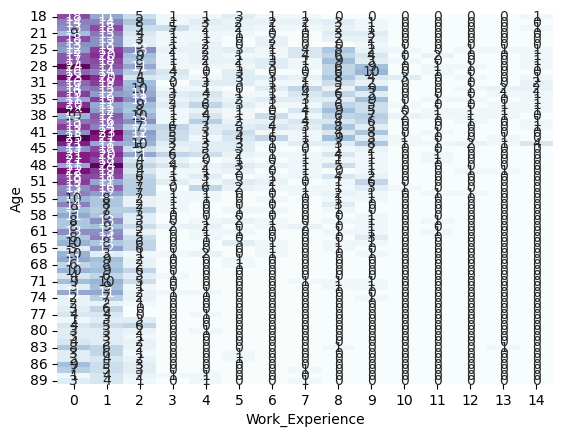

In [249]:
pd.crosstab(data.Age, data.Work_Experience)
import seaborn as sns
sns.heatmap(pd.crosstab(data.Age, data.Work_Experience),
            cmap="BuPu", annot=True, cbar=False)
pd.crosstab(data.Profession, data.Age)

##### Age and Profession

<AxesSubplot:xlabel='Age', ylabel='Profession'>

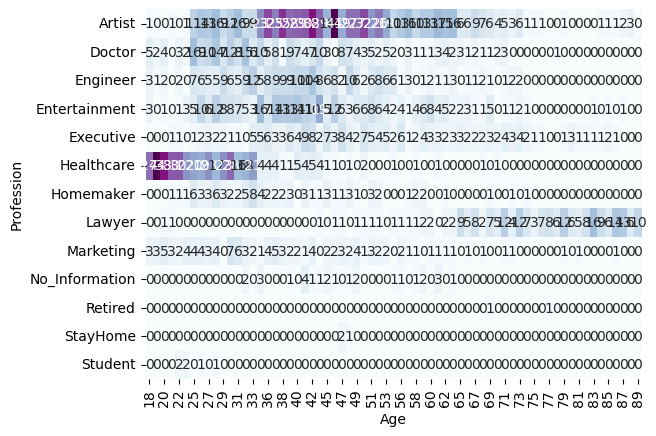

In [250]:
import seaborn as sns
sns.heatmap(pd.crosstab(data.Profession, data.Age),
            cmap="BuPu", annot=True, cbar=False)

Comment the incoherence:
We concluded  that the columns Work_Experience and Graduated don't make sense!! 
Work_Experience should be correlated with age from our exploratory analysis we proved that it is not.
A lot of people with real profession (ex: doctors, lawyers,...) are mentionned as not graduated which also does not make any sense!
We decided to keep these columns in the dataset but we will focus the analysis on the other columns

## Export the cleaned dataset as .csv

In [255]:
data.to_csv("NewMarkets_Python.csv", sep = ',')

## Export Table in mysql

In [261]:
! pip install pymysql
from sqlalchemy import create_engine
import pymysql.cursors 
import os
import getpass

     ---------------------------------------- 43.8/43.8 kB 2.2 MB/s eta 0:00:00


different ways to capture passwords 

In [ ]:
#pw  = os.getenv('mysql...')

In [262]:
pw = getpass.getpass()

········


In [264]:
connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/' #root is username
engine = create_engine(connection_string)

In [266]:
with engine.connect() as conn:
    conn.execute(f"CREATE DATABASE IF NOT EXISTS Project_3")

In [267]:
data.to_sql('NewMarket', engine, 'Project_3', if_exists='replace', index = True) #if we want ot use the index that we predefined 

C:\Users\Rachad\anaconda3\lib\site-packages\pandas\io\sql.py:1666: UserWarning: The provided table name 'NewMarket' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


2627

## The full mysql analysis in the second jupyter: Project_week_3 - SQL Queries